In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Dataset

## NSL-KDD

### The NSL-KDD dataset is an enhanced version of the widely acknowledged KDD'99 dataset

Available at: https://archive.ics.uci.edu/dataset/130/kdd+cup+1999+data

In [2]:
## Unzip the dataset archive 
zip_file_path = 'NSL-KDD.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_names = zip_ref.namelist()
    #zip_ref.extractall('DataSetFiles/')

In [3]:
# Display the files names
file_names

['index.html',
 'KDDTest1.jpg',
 'KDDTest-21.arff',
 'KDDTest-21.txt',
 'KDDTest+.arff',
 'KDDTest+.txt',
 'KDDTrain1.jpg',
 'KDDTrain+.arff',
 'KDDTrain+.txt',
 'KDDTrain+_20Percent.arff',
 'KDDTrain+_20Percent.txt']

In [4]:
# Load both train and test datasets
df_train = pd.read_csv('DataSetFiles/KDDTrain+.txt', header=None)
df_test = pd.read_csv('DataSetFiles/KDDTest+.txt', header=None)

# Dataset attributes

In each record there are 41 types of features, ordered as following:

'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'

In [5]:
# Column names
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

In [6]:
# Add column names to both test and train datasets
df_train.columns = columns
df_test.columns = columns

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

We can identify that there are 3 types of attribute value types. (Nominal, binary and numeric)

In [8]:
# Display unique values
print(df_train['protocol_type'].unique())
print(df_test['protocol_type'].unique())

['tcp' 'udp' 'icmp']
['tcp' 'icmp' 'udp']


In [9]:
# Display unique values
print(df_train['service'].unique())
print(df_test['service'].unique())

['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql

In [10]:
# Display unique values
print(df_train['service'].nunique())
print(df_test['service'].nunique())

70
64


In [11]:
# Display unique values
print(df_train['flag'].unique())
print(df_test['flag'].unique())

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH']


In [12]:
# Display unique values
print(df_train['attack'].unique())
print(df_test['attack'].unique())

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']
['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']


In [13]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


# Attributes dictionary

- @attribute 'duration' real
- @attribute 'protocol_type' {'tcp' 'udp' 'icmp'} 
- @attribute 'service' {'ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns' 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50' 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp''bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois' 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell' 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier' 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2' 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i' 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'} 
- @attribute 'flag' { 'SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'}
- @attribute 'src_bytes' real
- @attribute 'dst_bytes' real
- @attribute 'land' {'0', '1'}
- @attribute 'wrong_fragment' real
- @attribute 'urgent' real
- @attribute 'hot' real
- @attribute 'num_failed_logins' real
- @attribute 'logged_in' {'0', '1'}
- @attribute 'num_compromised' real
- @attribute 'root_shell' real
- @attribute 'su_attempted' real
- @attribute 'num_root' real
- @attribute 'num_file_creations' real
- @attribute 'num_shells' real
- @attribute 'num_access_files' real
- @attribute 'num_outbound_cmds' real
- @attribute 'is_host_login' {'0', '1'}
- @attribute 'is_guest_login' {'0', '1'}
- @attribute 'count' real
- @attribute 'srv_count' real
- @attribute 'serror_rate' real
- @attribute 'srv_serror_rate' real
- @attribute 'rerror_rate' real
- @attribute 'srv_rerror_rate' real
- @attribute 'same_srv_rate' real
- @attribute 'diff_srv_rate' real
- @attribute 'srv_diff_host_rate' real
- @attribute 'dst_host_count' real
- @attribute 'dst_host_srv_count' real
- @attribute 'dst_host_same_srv_rate' real
- @attribute 'dst_host_diff_srv_rate' real
- @attribute 'dst_host_same_src_port_rate' real
- @attribute 'dst_host_srv_diff_host_rate' real
- @attribute 'dst_host_serror_rate' real
- @attribute 'dst_host_srv_serror_rate' real
- @attribute 'dst_host_rerror_rate' real
- @attribute 'dst_host_srv_rerror_rate' real
- @attribute 'class' {'normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap' 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop' 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land' 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack' 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named' 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm'}

In a real-time streaming scenario, the first priority is often to detect any anomaly, regardless of its type. Once detected, further analysis can be conducted to classify or understand the nature of the attack. Reason why I will simplified the attack attribute to: {'normal:0','attack:1'}

In [14]:
# changing attack labels
def change_label(data):
  data.attack.replace(['neptune','warezclient','ipsweep','portsweep',
                               'teardrop','nmap','satan','smurf','pod','back', 
                               'guess_passwd','ftp_write','multihop','rootkit', 
                               'buffer_overflow','imap','warezmaster','phf','land', 
                               'loadmodule','spy','perl','saint', 'mscan', 'apache2',
                               'snmpgetattack','processtable', 'httptunnel', 'ps',
                               'snmpguess', 'mailbomb','named', 'sendmail', 'xterm',
                               'worm', 'xlock', 'xsnoop','sqlattack',
                               'udpstorm'],'Attack',inplace=True)

In [15]:
change_label(df_train)
change_label(df_test)

In [16]:
df_train['attack'].unique()

array(['normal', 'Attack'], dtype=object)

In [17]:
df_test['attack'].unique()

array(['Attack', 'normal'], dtype=object)

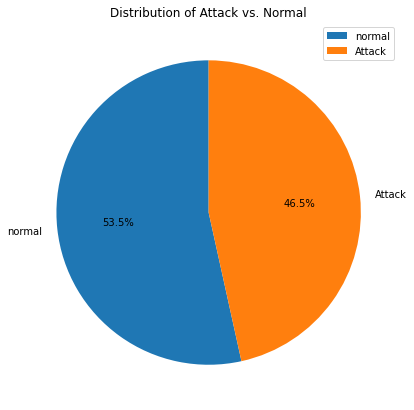

In [18]:
# Calculate the counts for each category
attacks_counts = df_train['attack'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10,7))
attacks_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Distribution of Attack vs. Normal')
plt.ylabel('') 
plt.show()

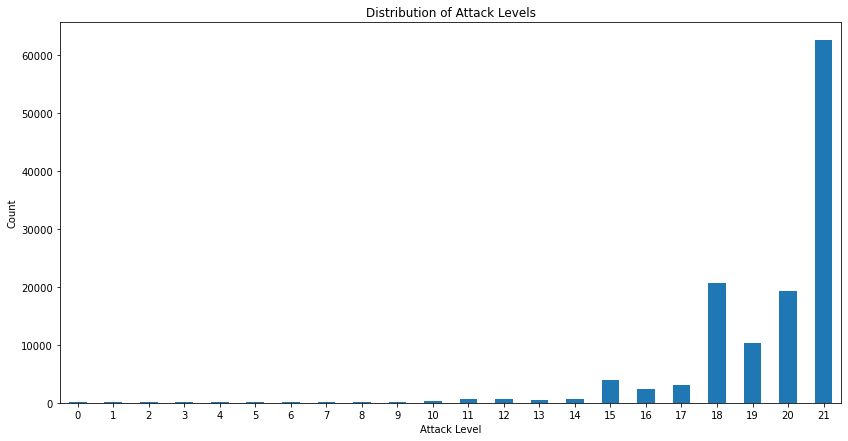

In [19]:
# Calculate the counts for each level
level_counts = df_train['level'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(14,7))
level_counts.plot.bar(rot=0)
plt.title('Distribution of Attack Levels')
plt.xlabel('Attack Level')
plt.ylabel('Count')
plt.show()

Column "level" will be removed since it's just an indicator of the attack level but is something that can't be know until the attack is detected and then clasified, so it is not relevant for our training nor testing

In [20]:
# remove attribute 'level'
df_train.drop(['level'],axis=1,inplace=True)
df_test.drop(['level'],axis=1,inplace=True)

# Label Encoding:

Binary Classification: Convert the label column to represent two classes: 'normal = 0' and 'attack = 1'. Since we are only interested in distinguishing between normal traffic and any kind of attack.

In [21]:
# Conver Attack column to binary
# normal = 0
# attack = 1
df_train['attack'] = df_train['attack'].replace({'normal': 0, 'Attack': 1})
df_test['attack'] = df_test['attack'].replace({'normal': 0, 'Attack': 1})

### Handling Categorical Features:
The NSL-KDD dataset contains categorical features such as protocol_type, service, and flag. These need to be converted to a numerical format:

- One-Hot Encoding: Convert categorical values into a format that can be provided to machine learning algorithms to improve accuracy. This involves creating binary columns for each category/label and marking them as '0' or '1' based on the encoding.

#### Note: As identified in the previous steps, the variables inside "service" column have some different values, resong why I would merge both datasets for the one-hot encoding to avoid any further errors

In [22]:
# Combine datasets
combined_data = pd.concat([df_train, df_test], axis=0)

# categorical columns
categorical_columns = ['protocol_type', 'service', 'flag']  

# Apply one-hot encoding to the specified categorical columns
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_columns)

# Split back into training and testing datasets
df_train_encoded = combined_data_encoded.iloc[:len(df_train)]
df_test_encoded = combined_data_encoded.iloc[len(df_train):]

In [23]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Columns: 123 entries, duration to flag_SH
dtypes: float64(15), int64(24), uint8(84)
memory usage: 48.5 MB


In [24]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22544 entries, 0 to 22543
Columns: 123 entries, duration to flag_SH
dtypes: float64(15), int64(24), uint8(84)
memory usage: 8.7 MB


## Splitting Features and Labels:
Separate the dataset into features (X) and labels/targets (Y) to facilitate training

In [25]:
from sklearn.model_selection import train_test_split
# Split training data into features (X_train) and target (Y_train)
X_train = df_train_encoded.drop("attack", axis=1)  # replace 'target_column_name' with the name of your target column
Y_train = df_train_encoded["attack"]

### Test Dataset Splitting:

I will split the KDDTest+.TXT dataset into two parts:

- Validation/Test Set: To evaluate and compare the performance of different neural network architectures.
- Streaming Simulation Set: To mimic streaming data and test the best-performing model in a streaming environment with Apache Spark.

In [26]:
# Split training data into features (X_test) and target (Y_test)
X_test = df_test_encoded.drop("attack", axis=1)  # replace 'target_column_name' with the name of your target column
Y_test = df_test_encoded["attack"]
# Split test data into validation and streaming set
X_validation, X_streaming, Y_validation, Y_streaming = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Normalize Numerical Features:

Neural networks work better with values between 0 and 1. Features with large magnitudes can disproportionately influence the training of the network.

- Min-Max Scaling: This is the most common method to normalize features.

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Identify non-binary columns for normalization in the training set
non_binary_columns = X_train.nunique()[X_train.nunique() > 2].index.tolist()

# Normalize using Min-Max Scaling based on the training data's statistics
scaler = MinMaxScaler()
X_train[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])
X_validation[non_binary_columns] = scaler.transform(X_validation[non_binary_columns])
X_streaming[non_binary_columns] = scaler.transform(X_streaming[non_binary_columns])

# Baseline Model:

Before training complex neural networks, it's often a good idea to establish a baseline performance using simpler models or methods. 

- Majority Class Classifier: This classifier always predicts the majority class from the training set. For example, if "normal" instances are more frequent than "attack" instances in the training set, this classifier would always predict "normal". It provides insights into the class distribution and sets a performance benchmark, especially for imbalanced datasets.

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the majority class classifier
clf = DummyClassifier(strategy="most_frequent")

# Train the classifier
clf.fit(X_train, Y_train)

# Predict on the validation set
Y_pred = clf.predict(X_validation)

# Evaluate the performance
accuracy = accuracy_score(Y_validation, Y_pred)
report = classification_report(Y_validation, Y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.43
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      4797
           1       1.00      0.00      0.00      6475

    accuracy                           0.43     11272
   macro avg       0.71      0.50      0.30     11272
weighted avg       0.76      0.43      0.25     11272



For this project I will compare the performance of tradition ML models vs NN

Models:

- Logistic Regression
- Random Forest
- Gradient Boosted Trees
- ANN

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)
gb_classifier = GradientBoostingClassifier(n_estimators=100)

# Train models
log_reg.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
gb_classifier.fit(X_train, Y_train)

# Predict on validation set
preds_lr = log_reg.predict(X_validation)
preds_rf = random_forest.predict(X_validation)
preds_gb = gb_classifier.predict(X_validation)

# Evaluate models
print("Logistic Regression:")
print(classification_report(Y_validation, preds_lr))
print("Random Forest:")
print(classification_report(Y_validation, preds_rf))
print("Gradient Boosting Classifier:")
print(classification_report(Y_validation, preds_gb))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.93      0.76      4797
           1       0.92      0.62      0.74      6475

    accuracy                           0.75     11272
   macro avg       0.78      0.77      0.75     11272
weighted avg       0.80      0.75      0.75     11272

Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      4797
           1       0.97      0.62      0.75      6475

    accuracy                           0.77     11272
   macro avg       0.81      0.79      0.77     11272
weighted avg       0.83      0.77      0.76     11272

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.69      0.94      0.80      4797
           1       0.94      0.69      0.80      6475

    accuracy                           0.80     11272
   macro avg       0.81      0.81      0.80     11272
weighted

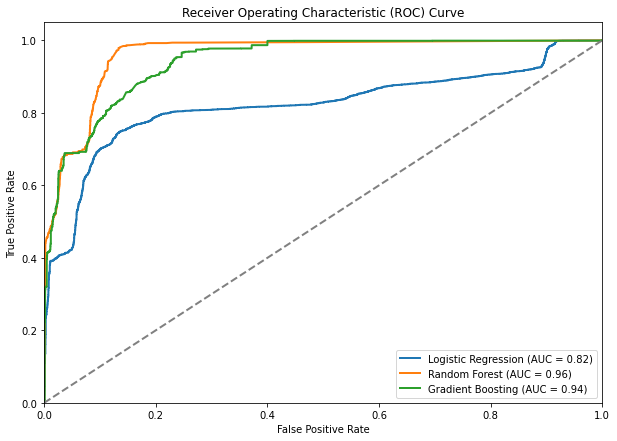

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a function to compute and plot the ROC AUC for a model
def plot_roc_auc(model, X, y, label=None):
    # Predict probabilities
    probas = model.predict_proba(X)[:,1]
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y, probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

# Plot ROC AUC for each model
plt.figure(figsize=(10, 7))
plot_roc_auc(log_reg, X_validation, Y_validation, label='Logistic Regression')
plot_roc_auc(random_forest, X_validation, Y_validation, label='Random Forest')
plot_roc_auc(gb_classifier, X_validation, Y_validation, label='Gradient Boosting')

# Plotting details
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Compute metrics for each model
results = []
for model, name in [(log_reg, 'Logistic Regression'), (random_forest, 'Random Forest'), (gb_classifier, 'Gradient Boosting')]:
    preds = model.predict(X_validation)
    accuracy = accuracy_score(Y_validation, preds)
    precision = precision_score(Y_validation, preds)
    recall = recall_score(Y_validation, preds)
    f1 = f1_score(Y_validation, preds)
    probas = model.predict_proba(X_validation)[:,1]
    roc_auc = roc_auc_score(Y_validation, probas)
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Convert results to DataFrame for easy display and sorting
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
results_df = results_df.sort_values(by='ROC AUC', ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Display the sorted results table
display(results_df)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Random Forest,0.767477,0.967492,0.615907,0.752666,0.960124
1,Gradient Boosting,0.795866,0.937160,0.690965,0.795448,0.941540
2,Logistic Regression,0.751774,0.919270,0.622548,0.742357,0.821169


### ANN (Artificial Neural Network):
This is a basic feedforward neural network.

In [32]:
from keras.models import Sequential
from keras.layers import Dense

model_ann = Sequential()
model_ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

In [33]:
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history_ann = model_ann.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=10, batch_size=32)


Epoch 1/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0461 - accuracy: 0.9839 - val_loss: 1.4231 - val_accuracy: 0.7803
Epoch 2/10
3937/3937 [==============================] - 6s 1ms/step - loss: 0.0215 - accuracy: 0.9922 - val_loss: 1.4204 - val_accuracy: 0.7881
Epoch 3/10
3937/3937 [==============================] - 6s 1ms/step - loss: 0.0165 - accuracy: 0.9940 - val_loss: 1.7511 - val_accuracy: 0.7927
Epoch 4/10
3937/3937 [==============================] - 6s 1ms/step - loss: 0.0142 - accuracy: 0.9947 - val_loss: 2.0002 - val_accuracy: 0.7928
Epoch 5/10
3937/3937 [==============================] - 6s 1ms/step - loss: 0.0129 - accuracy: 0.9951 - val_loss: 2.1652 - val_accuracy: 0.7796
Epoch 6/10
3937/3937 [==============================] - 6s 1ms/step - loss: 0.0121 - accuracy: 0.9953 - val_loss: 2.0541 - val_accuracy: 0.8059
Epoch 7/10
3937/3937 [==============================] - 6s 1ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 2.7922 - val_accuracy:

In [35]:
# Evaluate the model
loss, accuracy = model_ann.evaluate(X_validation, Y_validation)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


353/353 [==============================] - 0s 1ms/step - loss: 2.5729 - accuracy: 0.8031
Validation Accuracy: 80.31%


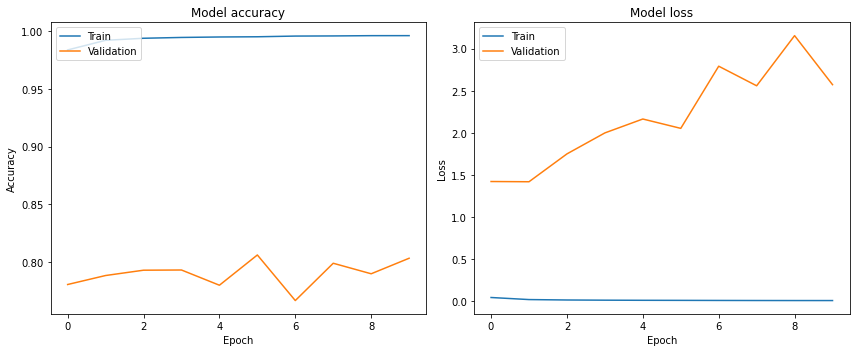

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


353/353 [==============================] - 0s 963us/step


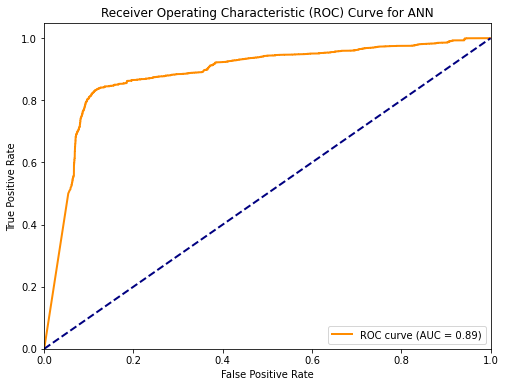

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
probas = model_ann.predict(X_validation).ravel()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_validation, probas)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend(loc="lower right")
plt.show()


In [39]:
# Save the model
model_ann.save("my_ann_model_v1.keras")

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_ann = Sequential()

# Input layer with dropout
model_ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dropout(0.5))

# Hidden layer with dropout
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.5))

# Output layer
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history_ann = model_ann.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=50, batch_size=32, callbacks=[early_stopping, reduce_lr])


Epoch 1/50
3937/3937 [==============================] - 7s 2ms/step - loss: 0.0816 - accuracy: 0.9738 - val_loss: 1.3526 - val_accuracy: 0.7608 - lr: 0.0010
Epoch 2/50
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0426 - accuracy: 0.9845 - val_loss: 1.6004 - val_accuracy: 0.7783 - lr: 0.0010
Epoch 3/50
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0353 - accuracy: 0.9876 - val_loss: 1.7201 - val_accuracy: 0.7904 - lr: 0.0010
Epoch 4/50
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0309 - accuracy: 0.9896 - val_loss: 1.7828 - val_accuracy: 0.8059 - lr: 0.0010
Epoch 5/50
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0290 - accuracy: 0.9899 - val_loss: 1.8400 - val_accuracy: 0.7898 - lr: 0.0010
Epoch 6/50
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0278 - accuracy: 0.9906 - val_loss: 1.8629 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 7/50
3937/3937 [==============================] - 6s

In [41]:
# Evaluate the model
loss, accuracy = model_ann.evaluate(X_validation, Y_validation)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

353/353 [==============================] - 0s 1ms/step - loss: 1.3526 - accuracy: 0.7608
Validation Accuracy: 76.08%


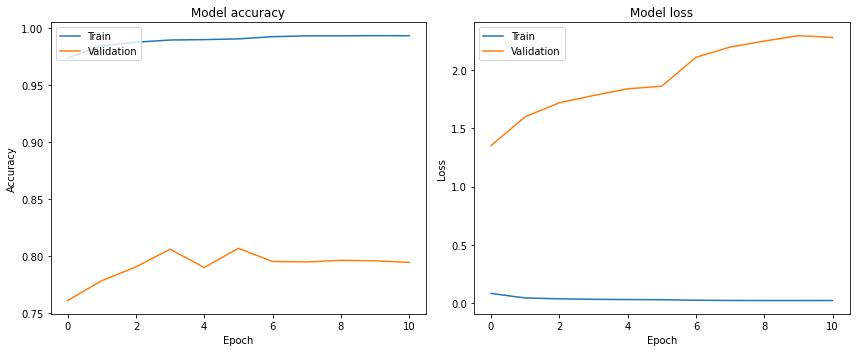

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

353/353 [==============================] - 0s 928us/step


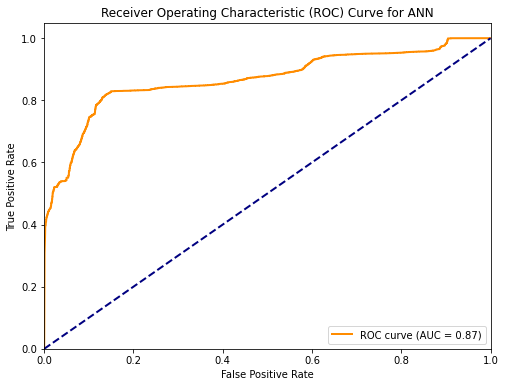

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
probas = model_ann.predict(X_validation).ravel()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_validation, probas)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend(loc="lower right")
plt.show()

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_ann = Sequential()

# Input layer with dropout
model_ann.add(Dense(96, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dropout(0.4))

# Hidden layer with dropout
model_ann.add(Dense(48, activation='relu'))
model_ann.add(Dropout(0.4))

# Output layer
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history_ann = model_ann.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])


Epoch 1/100
3937/3937 [==============================] - 7s 2ms/step - loss: 0.0715 - accuracy: 0.9770 - val_loss: 1.2746 - val_accuracy: 0.7662 - lr: 0.0010
Epoch 2/100
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 1.3412 - val_accuracy: 0.7838 - lr: 0.0010
Epoch 3/100
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0416 - accuracy: 0.9882 - val_loss: 1.4033 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 4/100
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0398 - accuracy: 0.9891 - val_loss: 1.3191 - val_accuracy: 0.7787 - lr: 0.0010
Epoch 5/100
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0374 - accuracy: 0.9897 - val_loss: 1.5625 - val_accuracy: 0.7787 - lr: 0.0010
Epoch 6/100
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0367 - accuracy: 0.9902 - val_loss: 1.5995 - val_accuracy: 0.7682 - lr: 0.0010
Epoch 7/100
3937/3937 [=============================

In [45]:
# Evaluate the model
loss, accuracy = model_ann.evaluate(X_validation, Y_validation)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

353/353 [==============================] - 0s 1ms/step - loss: 1.2746 - accuracy: 0.7662
Validation Accuracy: 76.62%


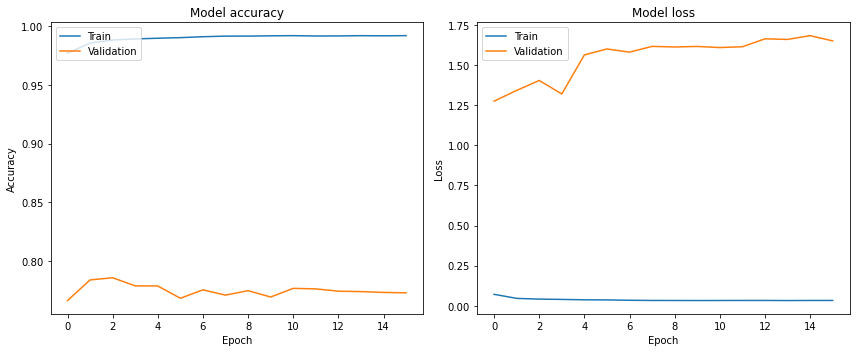

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

353/353 [==============================] - 0s 950us/step


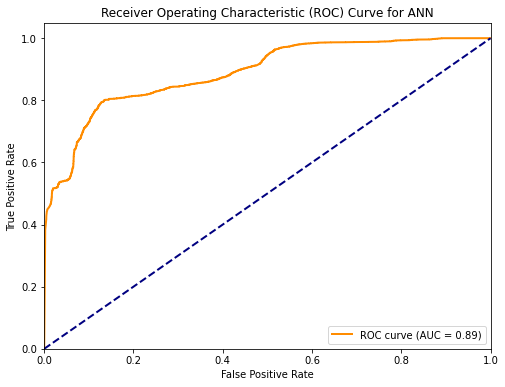

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
probas = model_ann.predict(X_validation).ravel()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_validation, probas)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend(loc="lower right")
plt.show()

In [48]:
# Concatenate dataset for streaming simulation
streaming_df = pd.concat([X_streaming, Y_streaming], axis=1)
# Save dataset for streaming simulation
streaming_df.to_csv('streaming_data.csv', index=False)

In [ ]:
# Compute the correlation matrix
corr_matrix = X_train.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

# Identify highly correlated features
threshold = 0.9
to_drop = []

In [ ]:
# Iterate over the features (columns)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.append(colname)

In [ ]:
# Remove correlated columns
X_train = X_train.drop(columns=to_drop)
X_validation = X_validation.drop(columns=to_drop)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model_ann = Sequential()
model_ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

In [ ]:
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_ann = model_ann.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=10, batch_size=32)


In [ ]:
# Evaluate the model
loss, accuracy = model_ann.evaluate(X_validation, Y_validation)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
probas = model_ann.predict(X_validation).ravel()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_validation, probas)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend(loc="lower right")
plt.show()